In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

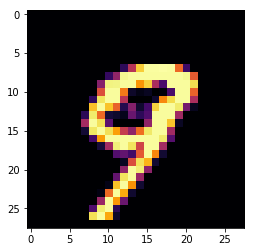

In [66]:
x87 = x_train[87]
plt.imshow(x87, cmap = 'inferno'); # standardized x works

In [67]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [68]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### 1-hot encoding

In [69]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Standardizing `x_train`, `x_test`

In [7]:
x_train_sd = x_train / x_train.max()
x_test_sd = x_test / x_test.max()

In [8]:
x_train_sd.max()

1.0

## Building NN

In [230]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adagrad, Adadelta

In [366]:
model = Sequential()
 
model.add(Dense(25, input_dim = 784)) 
model.add(Activation('selu')) 

model.add(Dense(20)) 
model.add(Activation('linear'))

model.add(Dense(10)) 
model.add(Activation('softmax')) 

In [367]:
model.compile(loss = 'mse', optimizer = Adadelta(lr=1), metrics=['accuracy']) 

In [368]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 25)                19625     
_________________________________________________________________
activation_231 (Activation)  (None, 25)                0         
_________________________________________________________________
dense_232 (Dense)            (None, 20)                520       
_________________________________________________________________
activation_232 (Activation)  (None, 20)                0         
_________________________________________________________________
dense_233 (Dense)            (None, 10)                210       
_________________________________________________________________
activation_233 (Activation)  (None, 10)                0         
Total params: 20,355
Trainable params: 20,355
Non-trainable params: 0
_________________________________________________________________


In [369]:
model.fit(x_train_sd, y_train, batch_size=100, epochs=20) 

Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0248 - acc: 0.8380
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0136 - acc: 0.9116
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0122 - acc: 0.9206
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0113 - acc: 0.9274
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0106 - acc: 0.9327
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0100 - acc: 0.9369
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0094 - acc: 0.9402
Epoch 8/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0089 - acc: 0.9443
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0084 - acc: 0.9480
Epoch 10/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0080 - acc: 0.9499

In [372]:
score = model.evaluate(x_test_sd, y_test)
print('Loss', round(score[0],4))
print('Accuracy', score[1])

10000/10000 [==============================] - 1s 79us/step
Loss 0.0065
Accuracy 0.9587


In [375]:
predict = model.predict_classes(x_test_sd)

In [376]:
def predict_res(number):
    plt.imshow(x_test[number].reshape(28,28), cmap='inferno')
    print('The prediction:', predict[number])

In [378]:
from ipywidgets import interact_manual
interact(predict_res, number=(0,9999));

interactive(children=(IntSlider(value=4999, description='number', max=9999), Output()), _dom_classes=('widget-…